## PROJECT-GENDER RECOGNITION BY VOICE

### PROBLEM STATEMENT:RECOGNIZING THE GENDER OF A PERSON BASED ON THEIR VOICE

#### IMPORTING THE PACKAGES REQUIRED

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the dataset

##### . To import the dataset we use pandas package-reads the dataset

In [2]:
import warnings # to remove warnings
warnings.filterwarnings('ignore')
# read file
df=pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


#### CALCULATING NUMBER OF ROWS AND COLUMNS USING SHAPE

In [3]:
print("df: {}".format(df.shape))

df: (3168, 21)


In [4]:
#data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


#### handling missing values:


In [5]:
df.dropna().head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


#### print null values

In [6]:
print("Null values present in data: {}".format(df.isnull().values.any()))

Null values present in data: False


In [7]:
## PRINTING THE COLUMN NAMES
print(df.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


In [8]:
df.shape

(3168, 21)

In [9]:
df.label.dtype

dtype('O')

In [10]:
type(df.label[0])

str

### Processing the dataset
After the data has been imported, we have to preprocess the data

In [11]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [12]:
df.dtypes.value_counts()

float64    20
object      1
dtype: int64

In [13]:
df.columns.value_counts()

meanfreq    1
maxdom      1
minfun      1
dfrange     1
maxfun      1
centroid    1
meandom     1
mindom      1
meanfun     1
modindx     1
kurt        1
median      1
Q75         1
sp.ent      1
Q25         1
IQR         1
sfm         1
sd          1
skew        1
mode        1
label       1
dtype: int64

In [14]:
df['dfrange'].value_counts()

0.000000    65
5.132812    15
0.625000    15
0.679688    14
3.750000    13
            ..
2.156250     1
1.976562     1
4.742188     1
5.234375     1
3.256836     1
Name: dfrange, Length: 1091, dtype: int64

In [15]:
# Checking the occurances(or) frequency of the values in a particular column
df['label'].value_counts()  # Mode

female    1584
male      1584
Name: label, dtype: int64

In [16]:
#check the data using describe()
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


#### Preprocessing :using labelencoder and normalization

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["label"] = le.fit_transform(df["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [18]:
df[:]=preprocessing.MinMaxScaler().fit_transform(df)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


### Visualization

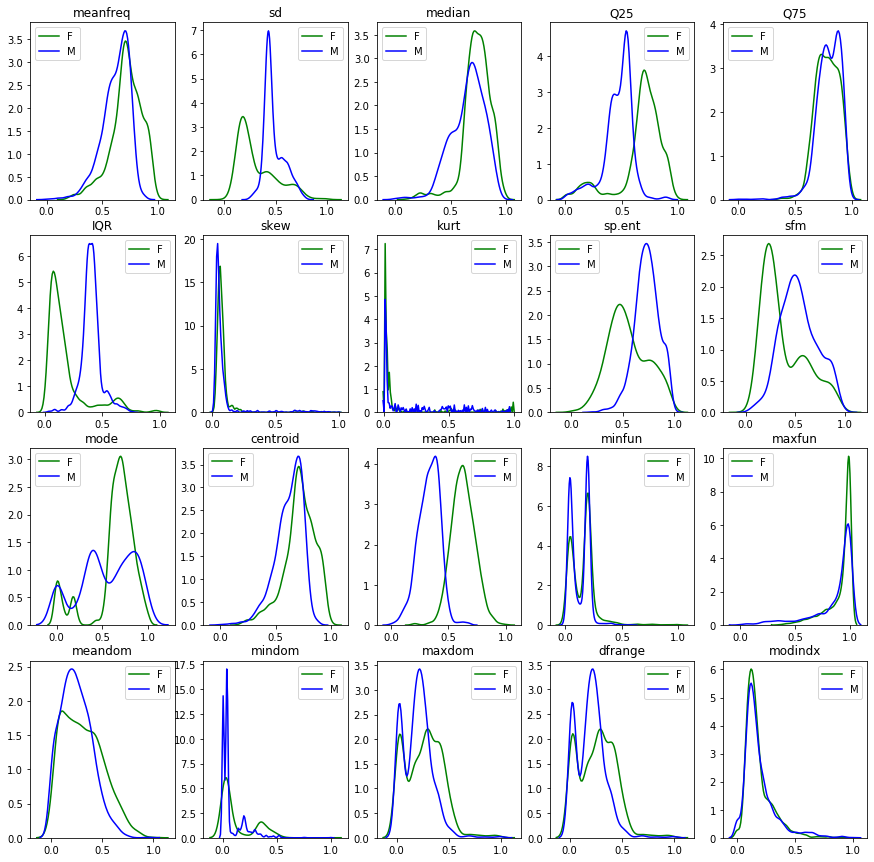

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(df.columns[i-1])
    sns.kdeplot(df.loc[df['label'] == 0, df.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(df.loc[df['label'] == 1, df.columns[i-1]], color= 'blue', label='M')

At first glance, most of the significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features.

#### SPLITTING THE DATA SET INTO TRAINING AND TESTING DATA

In [20]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
# Split the data and printing the train data
train, test = train_test_split(df, test_size=0.3)
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2730,0.743809,0.260613,0.753664,0.644834,0.820107,0.243463,0.033186,0.001460,0.616250,0.258070,...,0.743809,0.514888,0.191643,0.999749,0.719047,0.040860,0.396355,0.395923,0.109504,0.0
2659,0.754697,0.194559,0.767093,0.689686,0.785054,0.162827,0.048863,0.002972,0.547270,0.240765,...,0.754697,0.580910,0.205950,0.920915,0.471178,0.040860,0.387777,0.387339,0.118918,0.0
722,0.517366,0.441426,0.498969,0.383305,0.650512,0.350894,0.091060,0.011125,0.656487,0.478650,...,0.517366,0.201951,0.149945,0.203363,0.097062,0.193548,0.036946,0.033083,0.546773,1.0
2766,0.690476,0.225186,0.664523,0.671407,0.701747,0.101031,0.080209,0.007669,0.511518,0.333083,...,0.690476,0.491016,0.203841,0.990585,0.771943,0.040860,0.526090,0.525751,0.153262,0.0
1636,0.685090,0.400200,0.715738,0.692700,0.738920,0.114947,0.084055,0.008917,0.655680,0.521980,...,0.685090,0.653736,0.030819,0.981526,0.099004,0.006452,0.233024,0.233190,0.078588,0.0


In [22]:
X_train = train.iloc[:, :-1]
y_train = train["label"]
X_test = test.iloc[:, :-1]+
y_test = test["label"]

In [23]:
X_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
X_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [24]:
y_train.value_counts(normalize = True)

0.0    0.505187
1.0    0.494813
Name: label, dtype: float64

In [25]:
y_test.value_counts(normalize = True)

1.0    0.512093
0.0    0.487907
Name: label, dtype: float64

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2217, 20)
(2217,)
(951, 20)
(951,)


In [28]:
print(X_test3)
print(X_train3)
print(y_train3)
print(y_test3)+

       meanfun       IQR       Q25
750   0.209211  0.348415  0.444502
1225  0.383414  0.456527  0.548790
42    0.253286  0.413090  0.471913
604   0.257407  0.375325  0.480702
2709  0.582754  0.291792  0.691292
...        ...       ...       ...
2988  0.436301  0.281160  0.558462
190   0.394834  0.427652  0.251069
804   0.217473  0.393590  0.483852
3138  0.735035  0.606933  0.165369
1192  0.480469  0.447089  0.562301

[951 rows x 3 columns]
       meanfun       IQR       Q25
2730  0.514888  0.243463  0.644834
2659  0.580910  0.162827  0.689686
722   0.201951  0.350894  0.383305
2766  0.491016  0.101031  0.671407
1636  0.653736  0.114947  0.692700
...        ...       ...       ...
24    0.238252  0.428169  0.488411
668   0.321596  0.315698  0.521283
3047  0.790195  0.020025  0.791033
28    0.354185  0.434508  0.493469
288   0.443317  0.362823  0.542139

[2217 rows x 3 columns]
2730    0.0
2659    0.0
722     1.0
2766    0.0
1636    0.0
       ... 
24      1.0
668     1.0
3047    0.0
28 

In [29]:
print(X_train3.shape)
print(y_train3.shape)
print(X_test3.shape)+
print(y_test3.shape)

(2217, 3)
(2217,)
(951, 3)
(951,)


In [30]:
def classify(model,X_train,y_train,X_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [31]:
print(y_test)

750     1.0
1225    1.0
42      1.0
604     1.0
2709    0.0
       ... 
2988    0.0
190     1.0
804     1.0
3138    0.0
1192    1.0
Name: label, Length: 951, dtype: float64


In [32]:
print(y_train)

2730    0.0
2659    0.0
722     1.0
2766    0.0
1636    0.0
       ... 
24      1.0
668     1.0
3047    0.0
28      1.0
288     1.0
Name: label, Length: 2217, dtype: float64


### K-Nearest Neighbors
- Using neighbors.KNeighborsClassifier() to build the model.

In [33]:
# importing the KNN package
from sklearn import neighbors

In [34]:
def knn_error(k,X_train,y_train,X_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))
    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.024185068349106203 occurs at k=1.


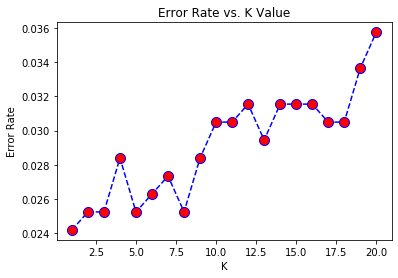

In [35]:
k=knn_error(21,X_train,y_train,X_test,y_test)

In [36]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

      female     0.9825    0.9677    0.9750       464
        male     0.9696    0.9836    0.9766       487

    accuracy                         0.9758       951
   macro avg     0.9761    0.9756    0.9758       951
weighted avg     0.9759    0.9758    0.9758       951



Lowest error is 0.02103049421661409 occurs at k=14.


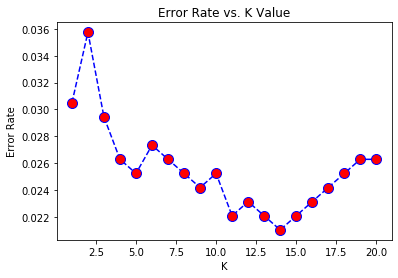

In [37]:
k=knn_error(21,X_train3,y_train3,X_test3,y_test3)

In [38]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

      female     0.9697    0.9655    0.9676       464
        male     0.9673    0.9713    0.9693       487

    accuracy                         0.9685       951
   macro avg     0.9685    0.9684    0.9684       951
weighted avg     0.9685    0.9685    0.9685       951



### Random forest
Using ensemble.RandomForestClassifier() to build the model.

In [42]:
from sklearn import ensemble

In [43]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.019978969505783387 occurs at n=41.


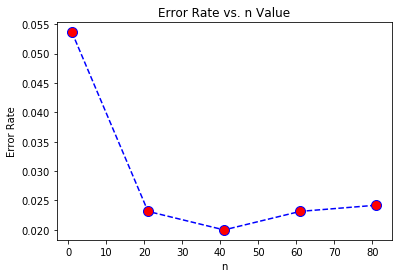

In [44]:
e=rf_error(100,X_train,y_train,X_test,y_test)

In [45]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

      female     0.9703    0.9849    0.9775       464
        male     0.9854    0.9713    0.9783       487

    accuracy                         0.9779       951
   macro avg     0.9778    0.9781    0.9779       951
weighted avg     0.9780    0.9779    0.9779       951



Lowest error is 0.028391167192429023 occurs at n=21.


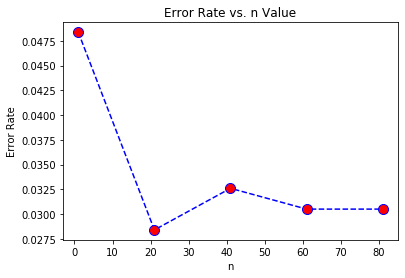

In [46]:
e=rf_error(100,X_train3,y_train3,X_test3,y_test3)

In [47]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,X_train3,y_train3,X_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9638    0.9763    0.9700       464
        male     0.9771    0.9651    0.9711       487

    accuracy                         0.9706       951
   macro avg     0.9705    0.9707    0.9705       951
weighted avg     0.9706    0.9706    0.9706       951



### XgBoost
Using xgboost.XGBClassifier() to build the model.

In [48]:
import xgboost

In [49]:
model = xgboost.XGBClassifier()
classify(model,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

      female     0.9704    0.9892    0.9797       464
        male     0.9895    0.9713    0.9803       487

    accuracy                         0.9800       951
   macro avg     0.9800    0.9802    0.9800       951
weighted avg     0.9802    0.9800    0.9800       951



In [50]:
model = xgboost.XGBClassifier()
classify(model,X_train3,y_train3,X_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9639    0.9784    0.9711       464
        male     0.9792    0.9651    0.9721       487

    accuracy                         0.9716       951
   macro avg     0.9715    0.9718    0.9716       951
weighted avg     0.9717    0.9716    0.9716       951



#### CONCLUSION:By using random forest and xgboost i am getting 98% accuracy but xgboost is the one giving best accuracy